# Sparks Foundation Task - 1

## Prediction using Supervised ML : Task 1 

### Problem Statement :
**Predict the percentage of a student based on the number of study hours. What will be the predicted score if a student studies for 9.25hr/day?**

In [24]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from scipy import stats

In [6]:
# Reading data from remote link
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Data Imported successfully")
data.head(10)

Data Imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


* The Average study hours 5.012

* The Average scores 51.48

In [9]:
#Now we check for Null value if it's  present
data.isna().sum()

Hours     0
Scores    0
dtype: int64

* Here there is no Null value present in data.

In [12]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [15]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


* Here there is no duplicated data present in data.

**Visualizing data**

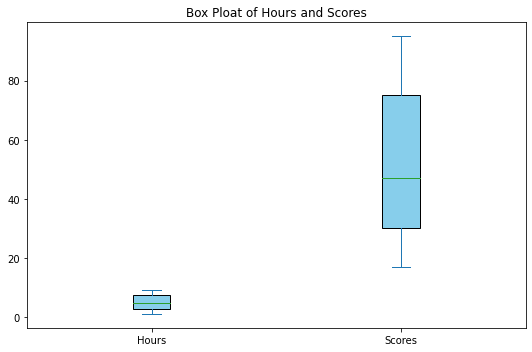

In [19]:
plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
boxplot = data[['Hours', 'Scores']].plot(kind = 'box', title = "Box Ploat of Hours and Scores" , 
                                             patch_artist=True,
                                            boxprops={'facecolor': 'skyblue',
                                            'edgecolor': 'black'}) 


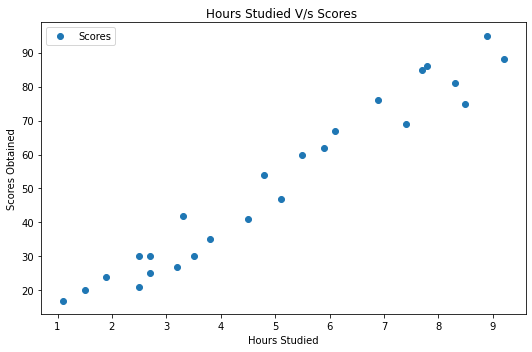

In [21]:
# Plotting the distribution of scores
data.plot(x="Hours" , y = "Scores", style="o")
plt.title("Hours Studied V/s Scores ")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

* From the above graph,we see there are highly positive linear association between the number of hours studies and percentage of score.

**First we check for Normality of data**

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1.1, 1.5, 1.9, 2.5, 2.5, 2.7, 2.7, 3.2, 3.3, 3.5, 3.8, 4.5, 4.8,
         5.1, 5.5, 5.9, 6.1, 6.9, 7.4, 7.7, 7.8, 8.3, 8.5, 8.9, 9.2])),
 (2.583577905087343, 5.012, 0.9789402086868313))

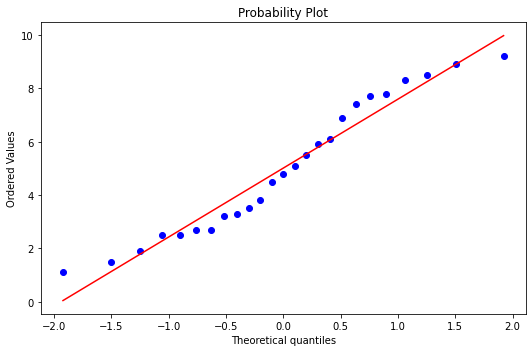

In [26]:
stats.probplot(data['Hours'], plot = plt)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([17, 20, 21, 24, 25, 27, 30, 30, 30, 35, 41, 42, 47, 54, 60, 62, 67,
         69, 75, 76, 81, 85, 86, 88, 95], dtype=int64)),
 (25.58038152298867, 51.47999999999999, 0.9678851140595))

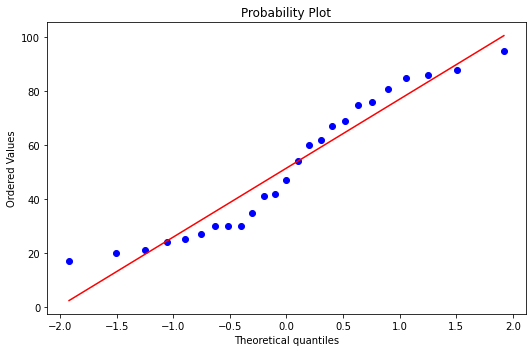

In [27]:
stats.probplot(data['Scores'], plot = plt)

**Checking Normality by Statistical Tests**

* H0 : Data is distributed normally

            V/s.

* H1 : Data is not distributed normally

In [29]:
stats.shapiro(data['Hours'])

ShapiroResult(statistic=0.9401376247406006, pvalue=0.1491180658340454)

In [30]:
stats.shapiro(data['Scores'])

ShapiroResult(statistic=0.9168438911437988, pvalue=0.04343847185373306)

**Correlation between study hours and Scores obtained**

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


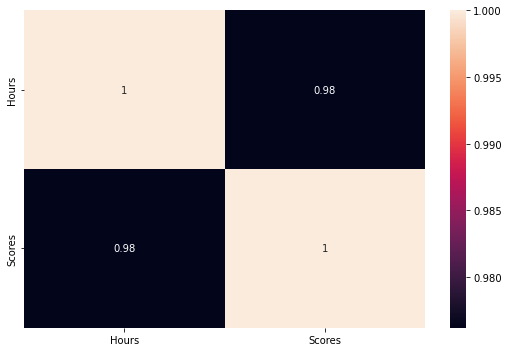

In [32]:
correlation = data.corr()
print(correlation)

#Visualizing Correlation by heatmap
sns.heatmap(correlation,annot = True);

* Thus, From this we may conclude that there is highly possitive correlation between Hours studied and Scores Obtained

**Preparing the data**

In [33]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [70]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [43]:

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [72]:
x_train.T

array([[3.8, 1.9, 7.8, 6.9, 1.1, 5.1, 7.7, 3.3, 8.3, 9.2, 6.1, 3.5, 2.7,
        5.5, 2.7, 8.5, 2.5, 4.8, 8.9, 4.5]])

In [73]:
y_train.T

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [46]:
# R square on training data
reg.score(x_train, y_train)

0.9515510725211552

In [47]:
reg.score(x_test, y_test)

0.9454906892105356

In [48]:
#RMSE on Training data
predicted_train=reg.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

5.558613350226342

In [49]:
#RMSE on Testing data
predicted_test=reg.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.6474476121003665

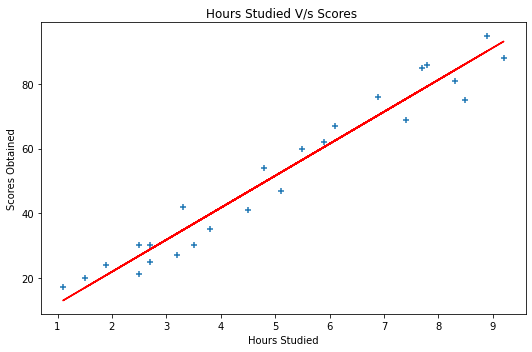

In [50]:
#plotting the regression line
line = reg.coef_*x+reg.intercept_ 

#plotting for the test data 
plt.scatter(x,y, marker = '+')
plt.plot(x , line , color = "red")
plt.title("Hours Studied V/s Scores ")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

**Computing actual v\s. predicted**

In [52]:
y_pred = reg.predict(x_test)
df =pd.DataFrame({"Actual Value" : y_test , "Predicted Value" : y_pred})
df

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


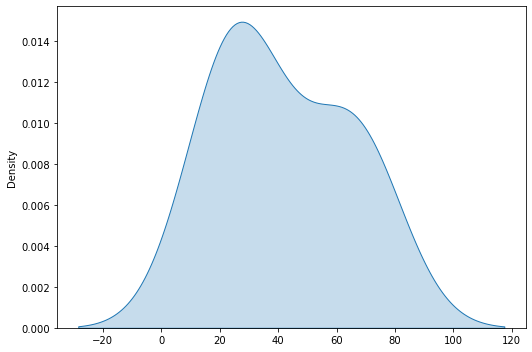

In [79]:
sns.kdeplot(y_test, label= 'Actual', shade=True);

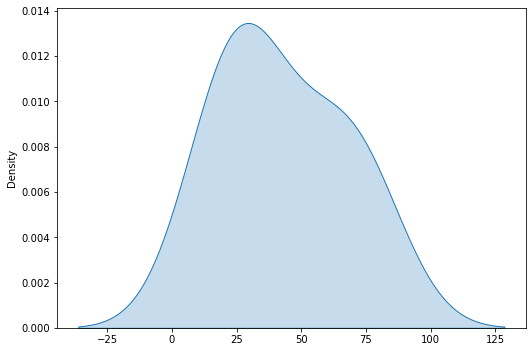

In [80]:
sns.kdeplot(y_pred, label='Predicted', shade= True);

**Model Evaluation**

* The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [69]:
from sklearn import metrics
print("Mean Absolute Error =",metrics.mean_absolute_error(y_test , y_pred))

Mean Absolute Error = 4.183859899002983


In [74]:
score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(score)

4.647447612100376


### Linear Regression using statsmodels(OLS)

In [53]:
import statsmodels.api as sm

In [55]:
X_train=sm.add_constant(x_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(x_test)

In [56]:
model = sm.OLS(y_train,X_train).fit()
model

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.79e-13
Time:                        21:56:29   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Calculate MSE on train
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)

In [59]:
np.sqrt(mse) #RMSE on train 

5.558613350226341

In [60]:
# Prediction on Test data
y_pred = model.predict(X_test)

In [61]:
#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test

4.647447612100376

**predicted score if a student studies for 9.25hr/day**

In [64]:
Hours= 9.25
own_predict = reg.predict([[Hours]])
print("If Student study",Hours, "Hours daily, then score will be",own_predict[0])

If Student study 9.25 Hours daily, then score will be 93.69173248737538


**Predicting the scores by user input in form of hours**

In [65]:
user_value = float(input("Enter Study hours to predict scores accordingly : "))
pre = reg.predict([[user_value]])
print("If Student study",user_value, "Hours daily, then score will be",pre[0])

Enter Study hours to predict scores accordingly : 5.25
If Student study 5.25 Hours daily, then score will be 54.04910656480642
